## <center><h3><b><font color ='black'>E-commerce Customers Segmentation</b> </font> </h3><center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
file_path = "E-commerce_data.xlsx"

customers = pd.read_excel(file_path, sheet_name='customers')
genders = pd.read_excel(file_path, sheet_name='genders')
cities = pd.read_excel(file_path, sheet_name='cities')
transactions = pd.read_excel(file_path, sheet_name='transactions')
branches = pd.read_excel(file_path, sheet_name='branches')
merchants = pd.read_excel(file_path, sheet_name='merchants')

In [3]:
df = transactions.merge(customers, on='customer_id', how='left')
df = df.merge(genders, on='gender_id', how='left')
df = df.merge(cities, on='city_id', how='left')
df = df.merge(branches, on='branch_id', how='left')
df = df.merge(merchants, on='merchant_id', how='left')
df

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,gender_name,city_name,merchant_id,merchant_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Female,Aswan,7,Berry-Anderson
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Female,Damietta,9,"Campbell, Shaffer and Martinez"
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Male,Alexandria,7,Berry-Anderson
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Female,Aswan,18,Lewis LLC
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Male,Damietta,15,Butler-Gomez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1,2022-01-08,12,1,Male,Fayyum,11,"Smith, Lawson and Hernandez"
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2,2023-08-03,5,2,Female,Port Said,18,Lewis LLC
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2,2022-03-12,10,2,Female,Asyut,18,Lewis LLC
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7,2022-11-19,5,2,Female,Port Said,7,Berry-Anderson


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      5000 non-null   int64         
 1   customer_id         5000 non-null   int64         
 2   transaction_date    5000 non-null   datetime64[ns]
 3   transaction_status  5000 non-null   object        
 4   coupon_name         5000 non-null   object        
 5   burn_date           2516 non-null   datetime64[ns]
 6   branch_id           5000 non-null   int64         
 7   join_date           5000 non-null   datetime64[ns]
 8   city_id             5000 non-null   int64         
 9   gender_id           5000 non-null   int64         
 10  gender_name         5000 non-null   object        
 11  city_name           5000 non-null   object        
 12  merchant_id         5000 non-null   int64         
 13  merchant_name       5000 non-null   object      

In [5]:
df.describe()

,transaction_id,customer_id,branch_id,city_id,gender_id,merchant_id
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,509.551600,5.529800,10.091800,1.48660,12.882600
std,1443.520003,287.065172,2.895788,5.860703,0.49987,4.000452
min,1.000000,1.000000,1.000000,1.000000,1.00000,7.000000
25%,1250.750000,262.000000,3.000000,5.000000,1.00000,9.000000
50%,2500.500000,514.000000,6.000000,10.000000,1.00000,13.000000
75%,3750.250000,758.000000,8.000000,15.000000,2.00000,15.000000
max,5000.000000,1000.000000,10.000000,20.000000,2.00000,20.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

transaction_id           0
customer_id              0
transaction_date         0
transaction_status       0
coupon_name              0
burn_date             2484
branch_id                0
join_date                0
city_id                  0
gender_id                0
gender_name              0
city_name                0
merchant_id              0
merchant_name            0
dtype: int64

In [8]:
df['city_name'].unique()

array(['Aswan', 'Damietta', 'Alexandria', 'El-Mahalla El-Kubra', 'Giza',
       'Fayyum', 'Sohag', 'Suez', 'Cairo', 'Port Said', 'Tanta',
       'Mansoura', 'Shubra El-Kheima', 'Zagazig', 'Minya', 'Ismailia',
       'Beni Suef', 'Asyut', 'Qena', 'Damanhur'], dtype=object)

In [9]:
for col in df.columns:
    print(col, ":", df[col].nunique())
    print(df[col].value_counts().nlargest())
    print("\n"+ "*" * 20 + "\n")

transaction_id : 5000
1       1
3331    1
3338    1
3337    1
3336    1
Name: transaction_id, dtype: int64

********************

customer_id : 989
822    14
726    13
833    12
776    12
471    12
Name: customer_id, dtype: int64

********************

transaction_date : 885
2024-07-12    43
2024-07-02    33
2024-07-13    33
2024-07-10    32
2024-07-06    32
Name: transaction_date, dtype: int64

********************

transaction_status : 2
burned        2516
subscribed    2484
Name: transaction_status, dtype: int64

********************

coupon_name : 5000
uNY-568    1
lCa-763    1
JCY-213    1
DSY-050    1
xFH-194    1
Name: coupon_name, dtype: int64

********************

burn_date : 789
2024-07-24    13
2024-07-30    13
2024-07-23    13
2024-08-03    12
2024-05-01    12
Name: burn_date, dtype: int64

********************

branch_id : 10
1     527
10    526
6     507
9     506
7     496
Name: branch_id, dtype: int64

********************

join_date : 648
2021-08-13    31
2022-01-08  

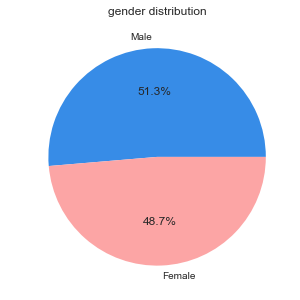

In [10]:
plt.figure(figsize=(6,5))
df['gender_name'].value_counts().plot(kind='pie' , autopct='%1.1f%%' , colors=['#378CE7','#fca5a5'])
plt.title('gender distribution')
plt.ylabel(' ')
plt.show()

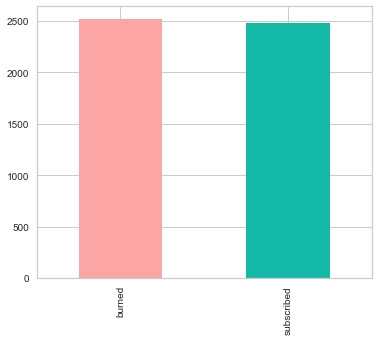

In [11]:
plt.figure(figsize=(6,5))
df['transaction_status'].value_counts().plot(kind='bar', color=['#fca5a5','#14b8a6'])
plt.show()

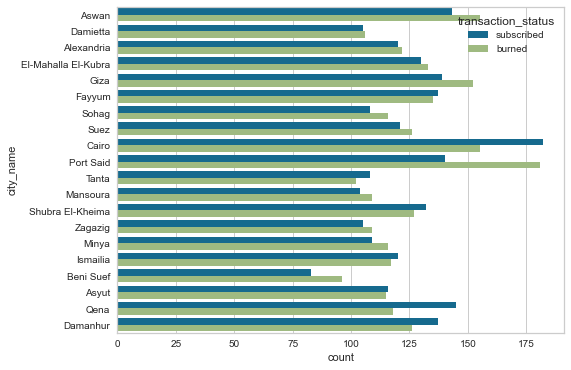

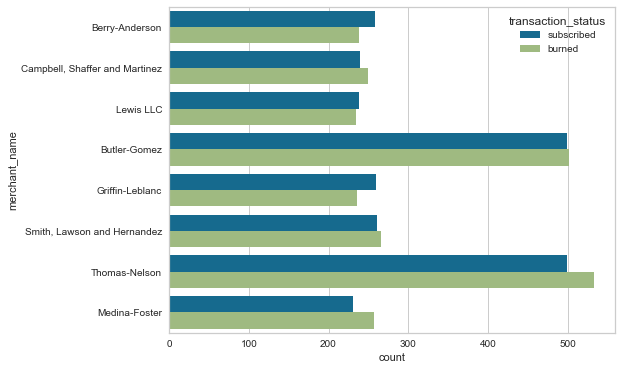

In [12]:
columns = ['city_name','merchant_name']
for col in columns[0:]:
    plt.figure(figsize=(8,6))
    sns.countplot(y=col, hue='transaction_status', data=df)
    plt.show()

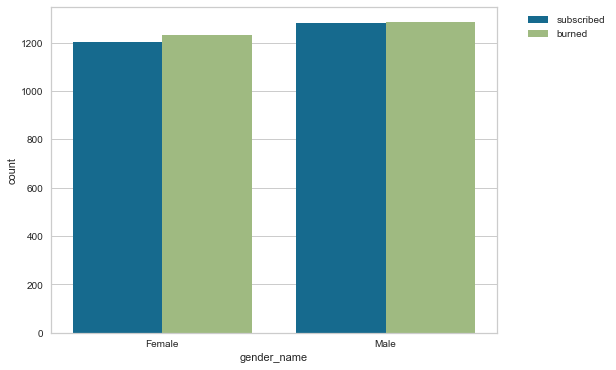

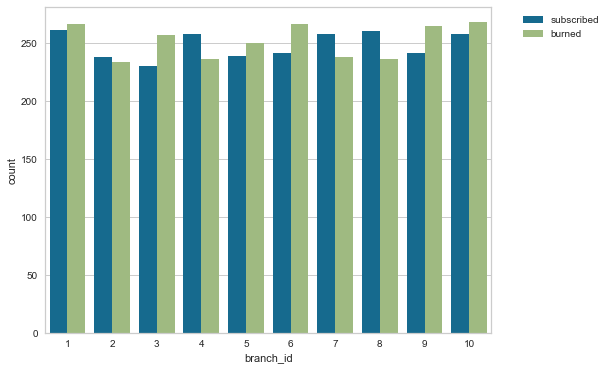

In [13]:
columns = ['gender_name','branch_id']
for col in columns[0:]:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, hue='transaction_status', data=df)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

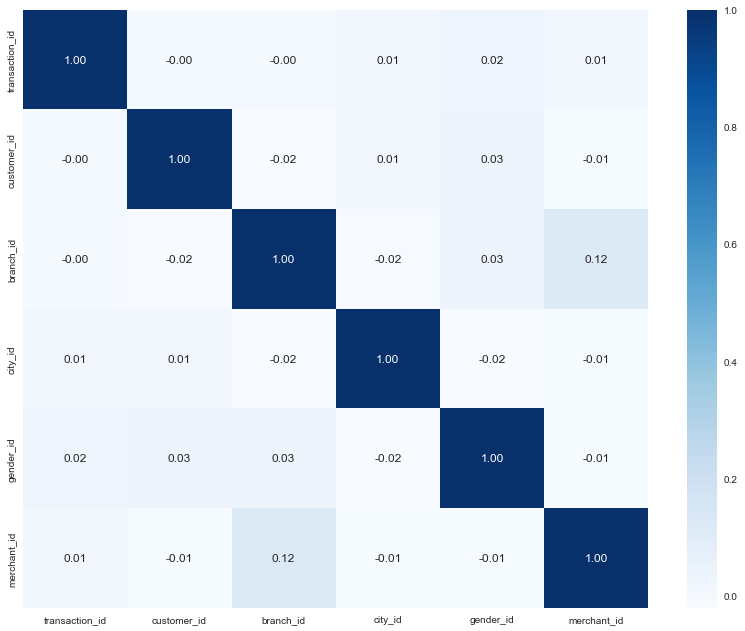

In [14]:
df_numeric = df.select_dtypes(include='number')

plt.figure(figsize=(14,11))
sns.heatmap(df_numeric.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.show()

#### handling missing values

In [15]:
# Filling datetime columns with a most frequent date
df['burn_date'] = df['burn_date'].fillna(df['burn_date'].mode()[0])

print(df.isnull().sum())

transaction_id        0
customer_id           0
transaction_date      0
transaction_status    0
coupon_name           0
burn_date             0
branch_id             0
join_date             0
city_id               0
gender_id             0
gender_name           0
city_name             0
merchant_id           0
merchant_name         0
dtype: int64


#### Data Aggregation

In [16]:
# Group transactions by 'customer_id' and count the number of transactions for each customer

customer_transactions_summary = transactions.groupby('customer_id').agg(
    total_transactions=('transaction_id', 'count')
).reset_index()

# Merge this summary with the customers dataframe to get customer details along with their transaction summary
customer_summary = pd.merge(customers, customer_transactions_summary, on='customer_id', how='left')

# Fill any missing transaction counts with 0 (for customers without any transactions)
customer_summary['total_transactions'].fillna(0, inplace=True)
customer_summary.head(10)

,customer_id,join_date,city_id,gender_id,total_transactions
0,1,2022-01-08,7,1,7.0
1,2,2023-05-02,20,2,3.0
2,3,2023-05-14,15,1,5.0
3,4,2022-11-25,11,2,1.0
4,5,2023-04-26,8,1,4.0
5,6,2023-01-31,7,1,4.0
6,7,2022-06-26,19,2,4.0
7,8,2024-02-26,11,1,7.0
8,9,2024-01-23,11,1,0.0
9,10,2023-08-19,4,2,8.0


In [17]:
customer_summary.describe()

,customer_id,city_id,gender_id,total_transactions
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.136000,1.491000,5.000000
std,288.819436,5.895953,0.500169,2.321937
min,1.000000,1.000000,1.000000,0.000000
25%,250.750000,5.000000,1.000000,3.000000
50%,500.500000,10.000000,1.000000,5.000000
75%,750.250000,15.000000,2.000000,6.000000
max,1000.000000,20.000000,2.000000,14.000000


In [18]:
customer_summary.isna().sum()

customer_id           0
join_date             0
city_id               0
gender_id             0
total_transactions    0
dtype: int64

In [19]:
customer_summary.duplicated().sum()

0

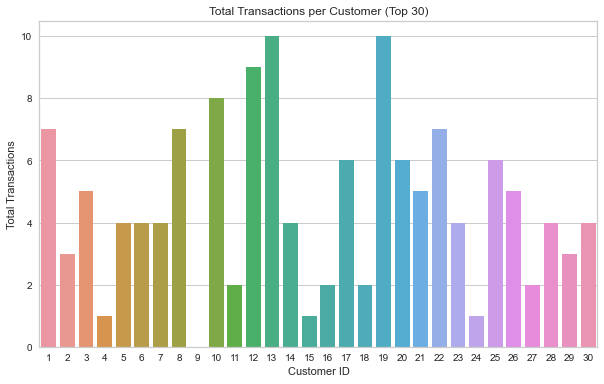

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_id', y='total_transactions', data=customer_summary.head(30))
plt.title('Total Transactions per Customer (Top 30)')
plt.xlabel('Customer ID')
plt.ylabel('Total Transactions')
plt.show()

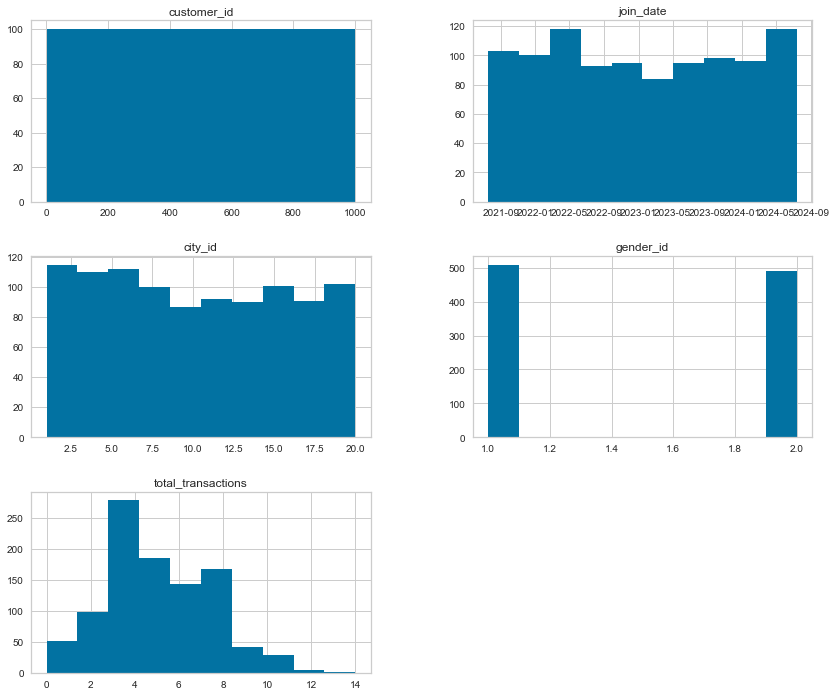

In [21]:
customer_summary.hist(figsize=(14,12))
plt.show()

In [22]:
# Group by gender_id to calculate average transactions per gender
gender_summary = customer_summary.groupby('gender_id').agg(
    avg_transactions=('total_transactions', 'mean'),
    total_customers=('customer_id', 'count')
).reset_index()

print(gender_summary)

   gender_id  avg_transactions  total_customers
0          1          5.043222              509
1          2          4.955193              491


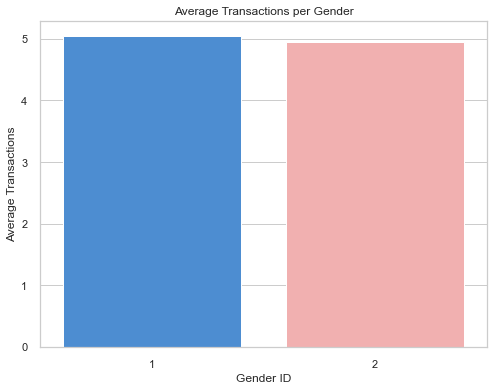

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='gender_id', y='avg_transactions', data=gender_summary, palette=['#378CE7','#fca5a5'])
plt.title('Average Transactions per Gender')
plt.xlabel('Gender ID')
plt.ylabel('Average Transactions')
plt.show()

In [24]:
# Group by city_id and calculate the average number of transactions per city
city_summary = customer_summary.groupby('city_id').agg(
    avg_transactions=('total_transactions', 'mean'),
    total_customers=('customer_id', 'count')
).reset_index()

print(city_summary)

    city_id  avg_transactions  total_customers
0         1          5.029851               67
1         2          5.041667               48
2         3          5.017241               58
3         4          4.980769               52
4         5          5.015625               64
5         6          5.145833               48
6         7          4.953488               43
7         8          4.614035               57
8         9          4.666667               45
9        10          5.500000               42
10       11          5.780488               41
11       12          5.333333               51
12       13          4.367347               49
13       14          5.146341               41
14       15          5.228070               57
15       16          5.113636               44
16       17          4.781818               55
17       18          4.972222               36
18       19          4.781818               55
19       20          4.765957               47


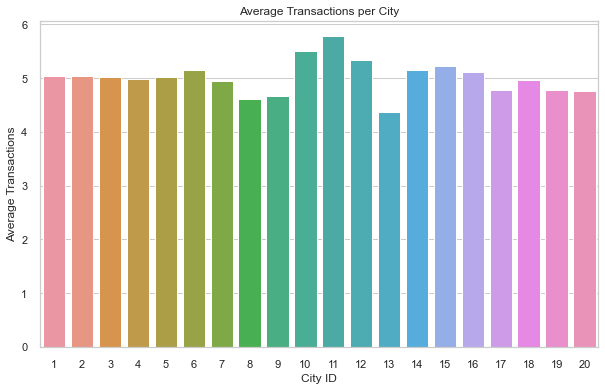

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='city_id', y='avg_transactions', data=city_summary)
plt.title('Average Transactions per City')
plt.xlabel('City ID')
plt.ylabel('Average Transactions')
plt.show()

we will use cutomer summary data with the model

### Elbow Method to get optimal K value (number of clusters)

In [28]:
customer_summary = customer_summary.drop(columns=['join_date'])

In [29]:
inertia= []
max_clusters = 10
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_summary)
    inertia.append(kmeans.inertia_)

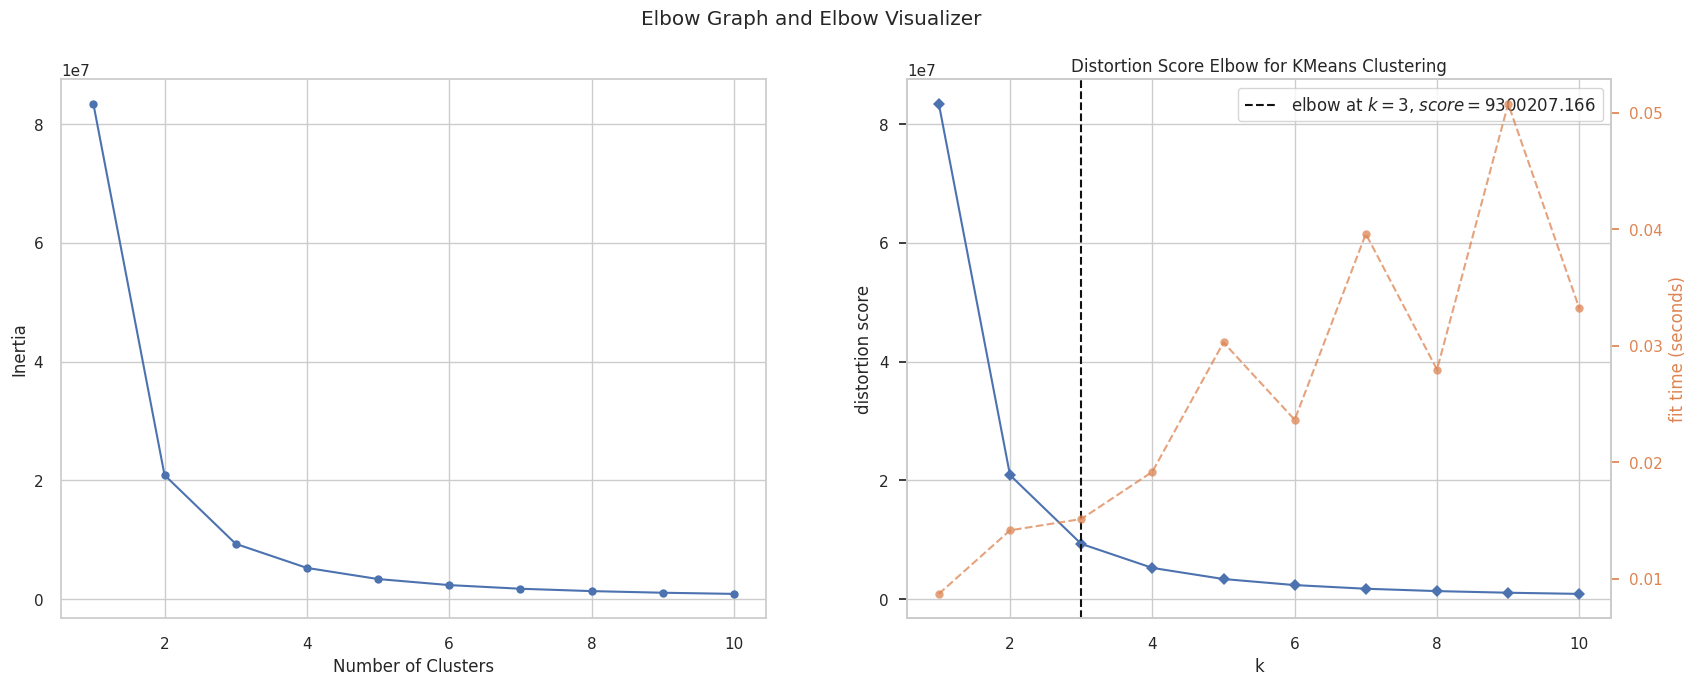

In [30]:
# elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')

# Kelbow visualizer
plt.subplot(1,2,2)
kmeans = KMeans()
visualize = KElbowVisualizer(kmeans,k=(1,11))
visualize.fit(customer_summary)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()

### Silhoutte Score for each k value

In [31]:
silhouette_avg = []
for k in range(2,11):
    kmeans = KMeans(n_clusters= k)
    cluster_labels = kmeans.fit_predict(customer_summary)
    silhouette_avg.append(silhouette_score(customer_summary,cluster_labels))

for k, score in zip(range(2, 11), silhouette_avg):
    print(f"Silhouette score for k={k}: {score:.4f}")

Silhouette score for k=2: 0.6247
Silhouette score for k=3: 0.5864
Silhouette score for k=4: 0.5659
Silhouette score for k=5: 0.5525
Silhouette score for k=6: 0.5422
Silhouette score for k=7: 0.5345
Silhouette score for k=8: 0.5271
Silhouette score for k=9: 0.5205
Silhouette score for k=10: 0.5149


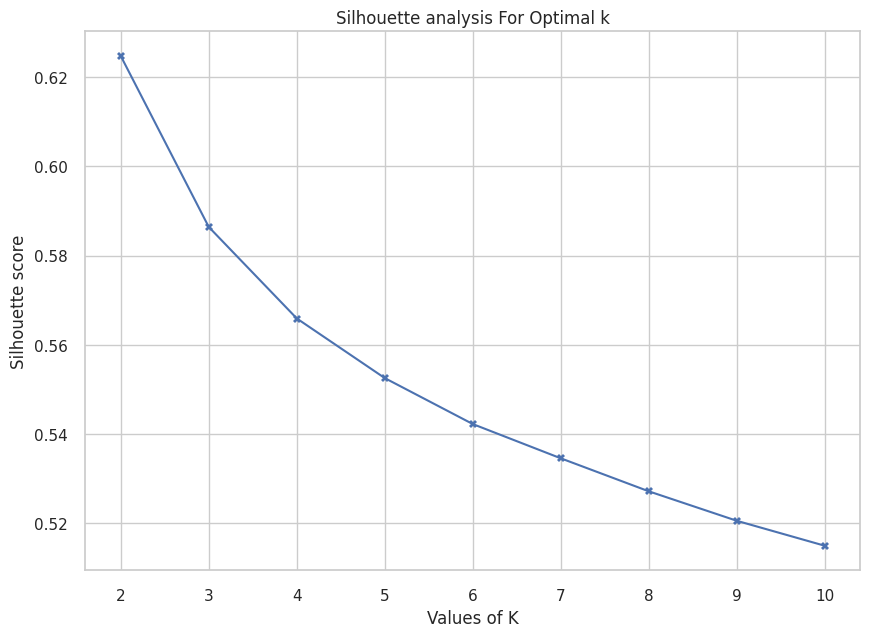

In [32]:
plt.figure(figsize=(10,7))
plt.plot(range(2,11),silhouette_avg, marker='X')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

### K-Means

In [33]:
model = KMeans(n_clusters=3)
model = model.fit(customer_summary)

In [34]:
y_km = model.predict(customer_summary)
centers = model.cluster_centers_

In [35]:
df['Cluster'] = pd.DataFrame(y_km)
df.to_csv("Cluster_data",index=False)

In [36]:
df['Cluster'].value_counts()

,count
Cluster,
0.0,335
2.0,334
1.0,331


<function matplotlib.pyplot.show(close=None, block=None)>

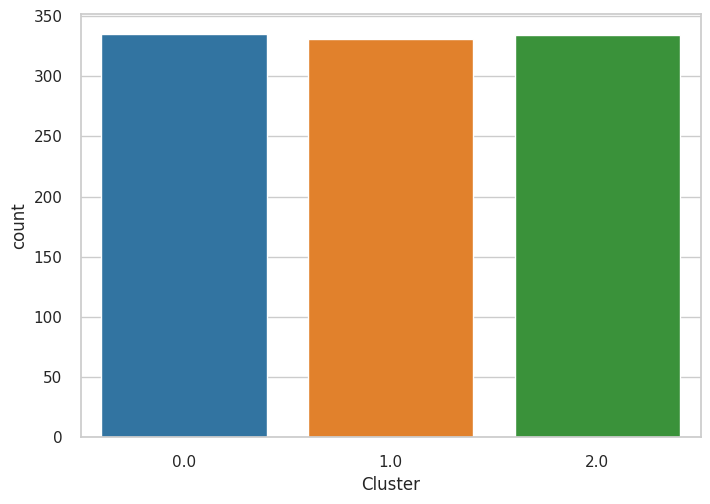

In [37]:
sns.countplot(data=df,x='Cluster', palette= ['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.show

#### Cluster 0, Cluster 1 and Cluster 2 have approximately the same number of customers, indicating that the clustering model divided the population relatively evenly.

### Analyzing Clusters

In [38]:
c_df = pd.read_csv('Cluster_data')
c_df.head()

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,gender_name,city_name,merchant_id,merchant_name,Cluster
0,1,733,2024-05-11,subscribed,uNY-568,2024-07-23,7,2023-05-16,15,2,Female,Aswan,7,Berry-Anderson,1.0
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Female,Damietta,9,"Campbell, Shaffer and Martinez",1.0
2,3,309,2022-11-13,subscribed,PLG-122,2024-07-23,7,2022-05-30,2,1,Male,Alexandria,7,Berry-Anderson,1.0
3,4,695,2024-01-26,subscribed,Wzf-897,2024-07-23,2,2023-11-27,15,2,Female,Aswan,18,Lewis LLC,1.0
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Male,Damietta,15,Butler-Gomez,1.0


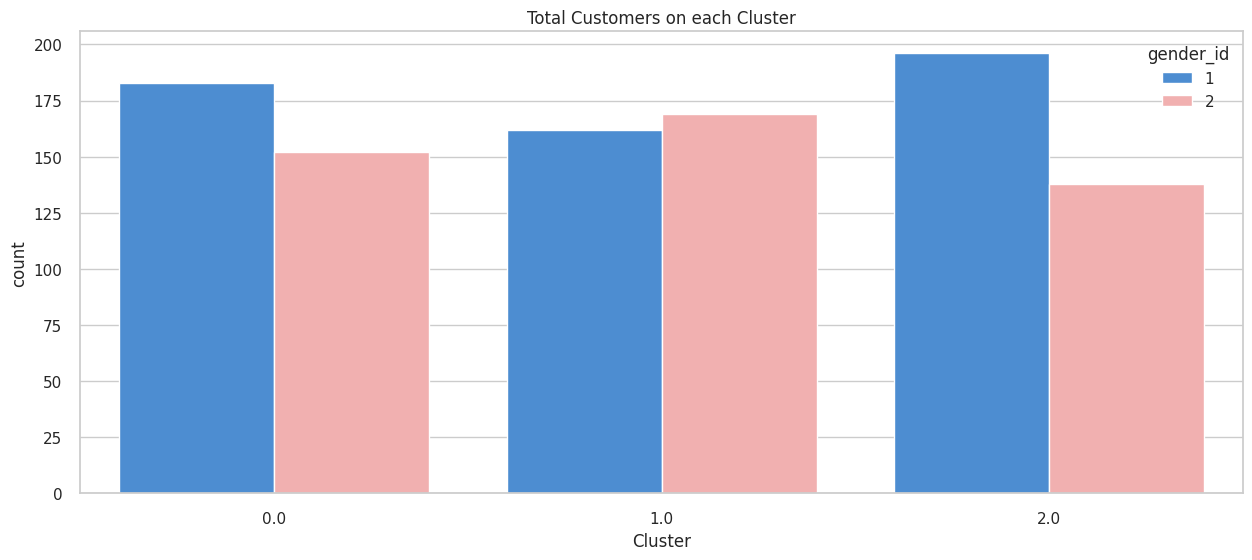

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(data=c_df,x='Cluster',hue='gender_id', palette=['#378CE7','#fca5a5'])
plt.title('Total Customers on each Cluster')
plt.show()

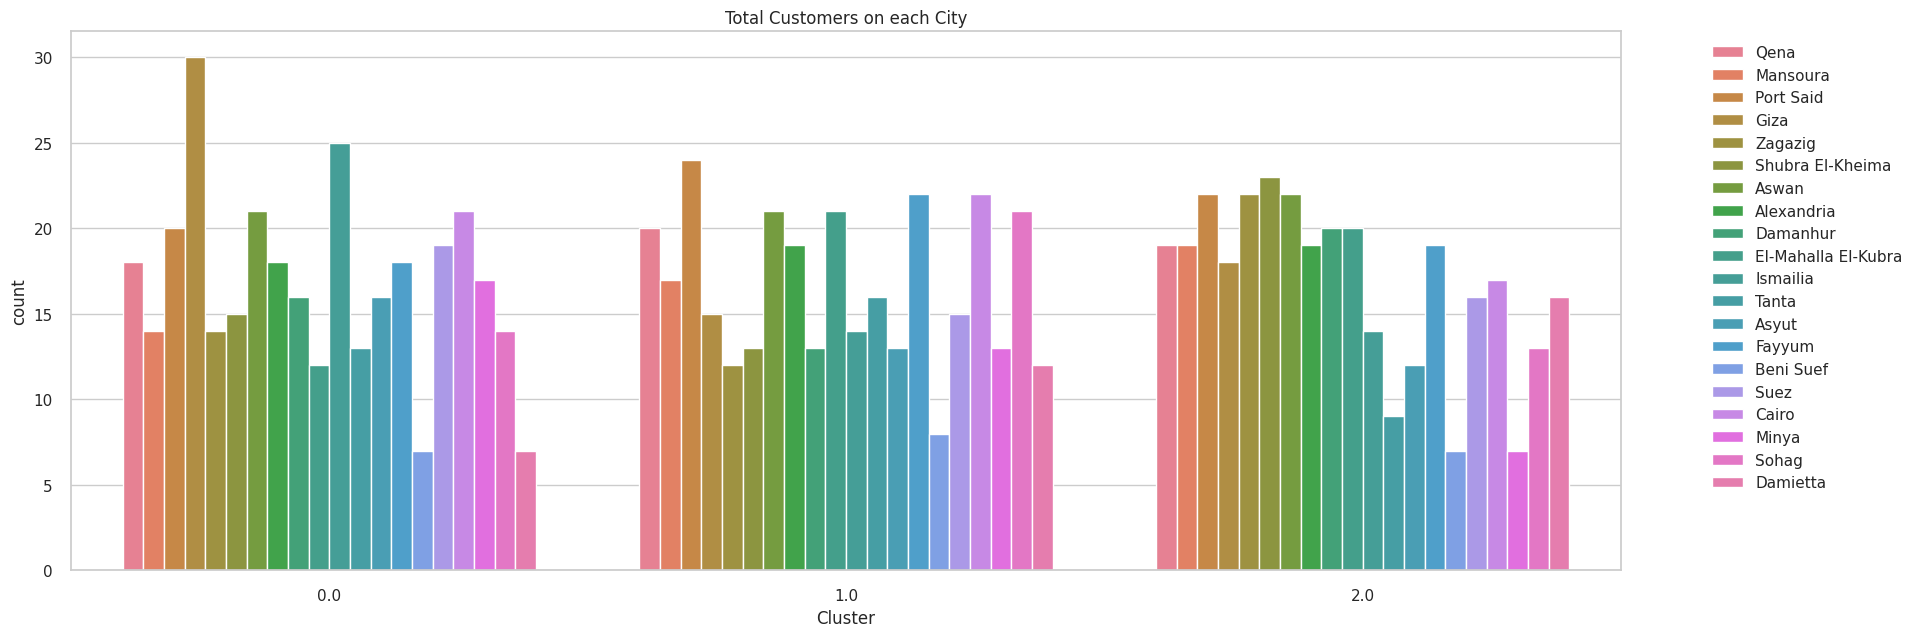

In [40]:
plt.figure(figsize=(20,7))
sns.countplot(data=c_df,x='Cluster',hue='city_name')
plt.title('Total Customers on each City')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

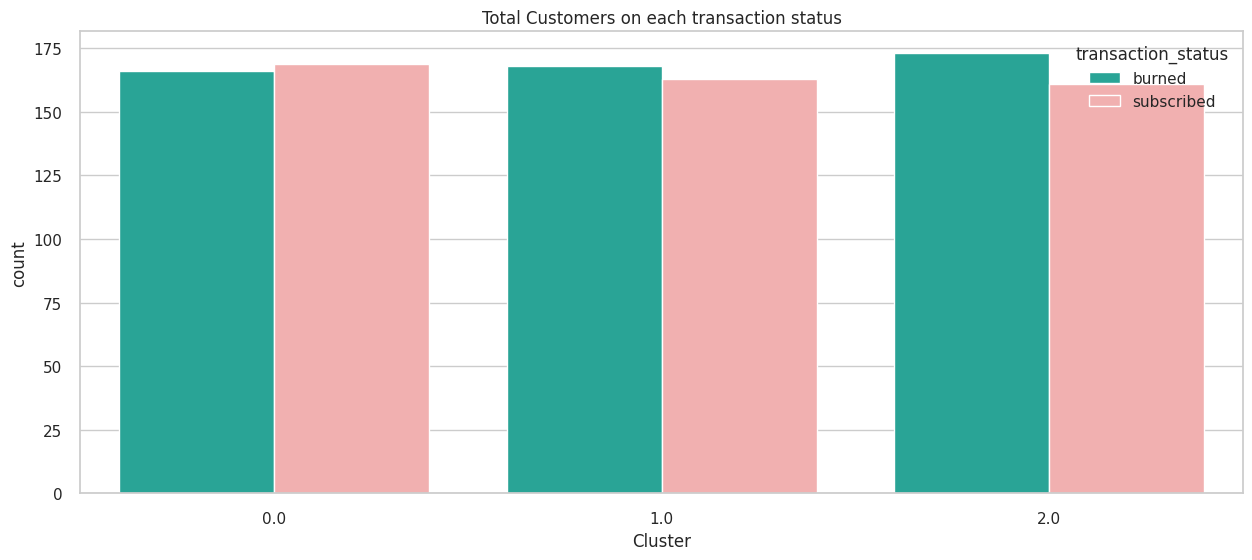

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(data=c_df,x='Cluster',hue='transaction_status', palette=['#14b8a6','#fca5a5'])
plt.title('Total Customers on each transaction status')
plt.show()

## Conclusion
#### From the above Cluster analysis these are the following insights about each clusters :-
1. The first bar chart represents customer distribution by gender across different clusters. The distribution across genders is fairly equal in cluster 2, but in cluster 0 and 1 there are differences, males is more than females.

2. The second bar chart represents customer distribution by city across different clusters. It shows that certain cities like Port Said, Giza and Zagazig have a large concentration of customers, while others like Damietta and Beni Suef have fewer customers.

3. The third bar chart compares the subscription and churn status of customers in each cluster: Cluster 2 has a slightly higher churn rate compared to subscribed customers, while clusters 0 and 1 have relatively balanced or higher subscribed customer counts

#### Recommendations:-
1. Use the gender information within each cluster to personalize content, offers, or product recommendations, especially where the gender ratio is not exactly 50-50. 

2. In cities with fewer customers or skewed distributions, targeted marketing campaigns or coupons could help balance customer acquisition across different clusters.

3. For cluster 2, focus on retention strategies to reduce churn rates. You might want to explore why this cluster has more churned customers and take proactive steps, such as offering cuopons, improving services, or addressing common pain points for this group.

4. For clusters with higher subscription rates, focus on customer satisfaction and retention.